In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib
import colorsys
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.patches import Polygon

In [2]:
df = pd.read_csv("2022.csv")
df

entry_date                   zone  group_size        result
0        9/2/2022  Core Enchantment Zone           8  Unsuccessful
1       8/15/2022          Colchuck Zone           2  Unsuccessful
2       8/12/2022              Snow Zone           8  Unsuccessful
3       7/12/2022  Core Enchantment Zone           2  Unsuccessful
4        9/3/2022           Stuart  Zone           4  Unsuccessful
...           ...                    ...         ...           ...
105679  8/22/2022  Core Enchantment Zone           4  Unsuccessful
105680   8/6/2022  Core Enchantment Zone           8  Unsuccessful
105681   8/2/2022  Core Enchantment Zone           4  Unsuccessful
105682   9/2/2022  Core Enchantment Zone           8  Unsuccessful
105683  8/31/2022  Core Enchantment Zone           8  Unsuccessful

[105684 rows x 4 columns]

In [3]:
# Constants
colors = {
    "Core Enchantment Zone": "gold",
    "Stuart  Zone": "orange",
    "Colchuck Zone": "blue",
    "Snow Zone": "green",
    "Eightmile/Caroline Zone": "brown",
}
FONT = fm.FontProperties(fname="/home/agale/enchantments-lottery/fonts/NationalPark-Medium.otf")
FONT_BOLD = fm.FontProperties(fname="/home/agale/enchantments-lottery/fonts/NationalPark-Bold.otf")

In [4]:
# Add day of week column
df["entry_date"] = pd.to_datetime(df["entry_date"])
df["entry_day_of_week"] = df["entry_date"].dt.dayofweek
df["entry_day_of_week_name"] = df["entry_date"].dt.day_name()

In [5]:
df.groupby("group_size").agg({"result": "count"})

result
group_size        
1             1114
2            18799
3             6461
4            30796
5             7099
6            18058
7             1328
8            22029

In [6]:
df.groupby(["zone", "result"]).agg({"result": "count"})

result
zone                            result              
Colchuck Zone                   Awarded          353
                                Unsuccessful   16165
Core Enchantment Zone           Awarded          723
                                Unsuccessful   68522
Eightmile/Caroline Zone         Awarded          284
                                Unsuccessful    2050
Eightmile/Caroline Zone (stock) Awarded           39
                                Unsuccessful     223
Snow Zone                       Awarded          637
                                Unsuccessful   10473
Stuart  Zone                    Awarded          472
                                Unsuccessful    5575
Stuart Zone (stock)             Awarded           20
                                Unsuccessful     148

In [7]:
df.groupby("entry_date").agg({"result": "count"})

result
entry_date        
2022-05-15      68
2022-05-16      40
2022-05-17      35
2022-05-18      49
2022-05-19      53
...            ...
2022-10-27      12
2022-10-28      24
2022-10-29       7
2022-10-30       4
2022-10-31       2

[170 rows x 1 columns]

In [8]:
df.groupby(["entry_day_of_week", "entry_day_of_week_name", "result"]).agg({"result": "count"})

result
entry_day_of_week entry_day_of_week_name result              
0                 Monday                 Awarded          353
                                         Unsuccessful   13794
1                 Tuesday                Awarded          341
                                         Unsuccessful   11818
2                 Wednesday              Awarded          331
                                         Unsuccessful   12865
3                 Thursday               Awarded          343
                                         Unsuccessful   18268
4                 Friday                 Awarded          349
                                         Unsuccessful   23496
5                 Saturday               Awarded          349
                                         Unsuccessful   14939
6                 Sunday                 Awarded          462
                                         Unsuccessful    7976

<Figure size 720x360 with 0 Axes>

<Figure size 12000x6000 with 0 Axes>

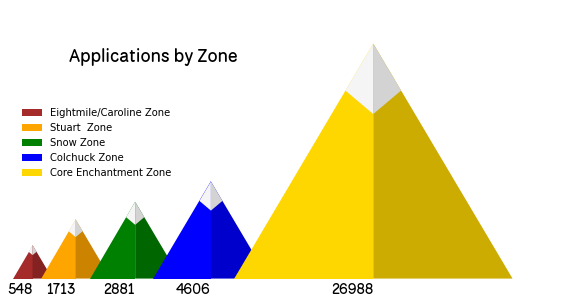

In [10]:
# Plot applications as mountains
zones = pd.read_csv("2022_by_zone.csv").sort_values("applications")

def scale_lightness(name, scale_l):
    color = matplotlib.colors.ColorConverter.to_rgb(name)
    # convert rgb to hls
    h, l, s = colorsys.rgb_to_hls(*color)
    # manipulate h, l, s values and return as rgb
    return colorsys.hls_to_rgb(h, min(1, l * scale_l), s=s)


# Make plot
plt.clf()
plt.figure(dpi=1200)
plt.rcParams["figure.figsize"] = (10, 5)
fig, ax = plt.subplots()

plt.xlim([0, 500])
plt.ylim([0, 250])

# Add title
ax.text(50, 200, "Applications by Zone", fontsize=18, fontproperties=FONT)

# Axes
ax.axis("off")
ax.set_xticks([])
ax.set_yticks([])

offset = 0

for i, row in zones.iterrows():
    if "stock" in row["zone"]:
        continue
    a = math.sqrt(row["applications"] * 4 / math.sqrt(3))
    h = 0.5 * math.sqrt(3) * a
    ax.add_patch(
        Polygon(
            [[offset, 0], [offset + a / 2, 0], [offset + a / 2, h]],
            color=colors[row["zone"]],
            ec=None,
            label=row["zone"]
        )
    )
    ax.add_patch(
        Polygon(
            [[offset + a / 2, 0], [offset + a, 0], [offset + a / 2, h]],
            color=scale_lightness(colors[row["zone"]], 0.8),
            ec=None,
        )
    )

    snow_h = 0.3 * h
    snow_x = 2 * snow_h / 3 / math.sqrt(3)
    ax.add_patch(
        Polygon(
            [
                [offset + a / 2 - snow_x, h - snow_h * 2 / 3],
                [offset + a / 2, h - snow_h],
                [offset + a / 2, h],
            ],
            color="whitesmoke",
            ec=None,
        )
    )
    ax.add_patch(
        Polygon(
            [
                [offset + a / 2 + snow_x, h - snow_h * 2 / 3],
                [offset + a / 2, h - snow_h],
                [offset + a / 2, h],
            ],
            color="lightgray",
            ec=None,
        )
    )
    
    ax.text(offset + a/2, -14, str(row["applications"]), fontsize=14, fontproperties=FONT, ha="right")

    offset = offset + (a / 2) * 1.4
    
# Legend
ax.legend(
    frameon=False,
    loc='center left'
)

plt.savefig("mountain_prototype.png", bbox_inches="tight", transparent=False, pad_inches=0.5)